# Facial Recognition Modeling 
In this project we will be working with real world data set, indicating whether or not a particular image is of skin or no skin.
We will try to create a model that will predict whether or not the image appearing in front of a camera is a skin or no skin.
This Dataset consists of 4 columns without headers, the missing headers are [B,G,R, Skin or No-skin]
* B => Blue: The ratio of Blue coloring 💙
* G => Green: The ratio of Green coloring 💚
* R => Red : The ratio of Red coloring 💖
* Skin or No-skin => Target (Skin = 1 & No_skin = 2)


#### Import Required Libraries
Import a few libraries you think you'll need (Or just import them as you go along!)

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
%matplotlib inline

#### Get your data
Read in the Skin_NonSkin.txt file and set it to a data frame called Data.

In [191]:
Data = pd.read_csv('Skin_NonSkin.txt',sep='\t',names=['B','G','R','Skin or No-Skin'])

#### Check the head of the data

In [192]:
Data.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check the shape

In [193]:
Data.shape

(245057, 4)

** Use info and describe() on data**

In [194]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B                  245057 non-null int64
G                  245057 non-null int64
R                  245057 non-null int64
Skin or No-Skin    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [195]:
Data.describe()

,B,G,R,Skin or No-Skin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


#### Check the number of skin ratio to the number of no skin

In [196]:
df = Data['Skin or No-Skin'].value_counts()
df

2    194198
1     50859
Name: Skin or No-Skin, dtype: int64

#### Check the percentage of Skin and No skin in the data

In [261]:
perc = df.apply(lambda x:100*x/df.sum())
print('Percentage of Skin is : {}%'.format(perc[1]))
print('Percentage of No-Skin is : {}%'.format(perc[2]))

Percentage of Skin is : 20.753947040892527%
Percentage of No-Skin is : 79.24605295910747%


#### Check for missing Values

In [198]:
Data.isnull().sum()

B                  0
G                  0
R                  0
Skin or No-Skin    0
dtype: int64

#### Convert the Target 
Such target
Skin == 1;
NO_SKIN == 0

In [201]:
Data['Skin or No-Skin'] = np.where(Data['Skin or No-Skin']==1, 1,0)

#### Check the new data head

In [202]:
Data.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check your new ratio

In [203]:
Data['Skin or No-Skin'].value_counts()

0    194198
1     50859
Name: Skin or No-Skin, dtype: int64

#### Exploratory Data Analysis
Let's use seaborn to explore the data!

Try recreating the plots shown below!

***Create a Countplot of Skin & No skin***

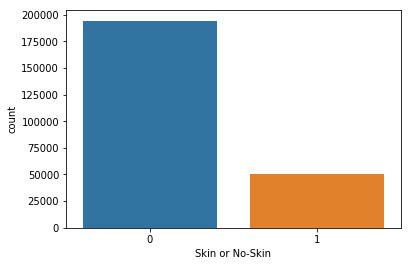

In [205]:
sns.countplot(x='Skin or No-Skin',data=Data)

***Create a bar chart of 'Skin or No-skin' & 'B'***

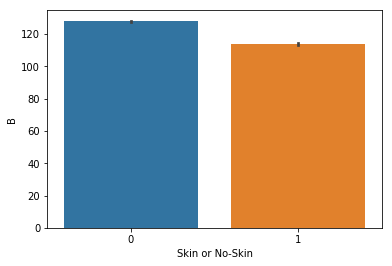

In [210]:
sns.barplot(x='Skin or No-Skin',y='B',data=Data)

***Create a bar chart of 'Skin or No-skin' & 'G'***

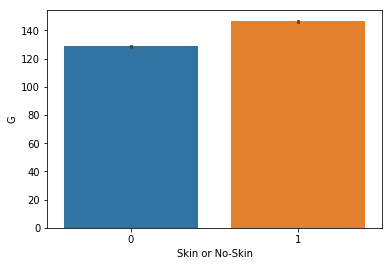

In [208]:
sns.barplot(x='Skin or No-Skin',y='G',data=Data)

***Create a bar chart of 'Skin or No-skin' & 'R'***

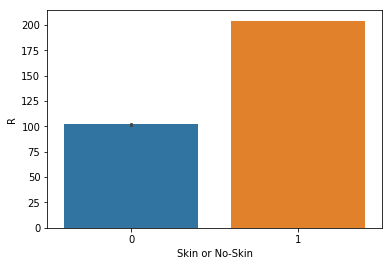

In [209]:
sns.barplot(x='Skin or No-Skin',y='R',data=Data)

#### Logistic Regression
Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

***Define Your features and target***

In [213]:
from sklearn.model_selection import train_test_split
X = Data[['B','G','R']]
y = Data['Skin or No-Skin']

***Split the data into training set and testing set using train_test_split***

In [214]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,
                                                 random_state = 30)

***Import your model and instanciate***

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions and Evaluations
***Now predict values for the testing data.***

In [217]:
predictions = logReg.predict(X_test)

#### Import confusion_matrix,classification_report, accuracy_score

In [222]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [227]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     38867
           1       0.79      0.83      0.81     10145

    accuracy                           0.92     49012
   macro avg       0.87      0.89      0.88     49012
weighted avg       0.92      0.92      0.92     49012



In [240]:
print('Accuracy is {:.3f}'.format(accuracy_score(y_test,predictions)*100))

Accuracy is 91.988


In [232]:
print('Confusion Matrix:\n',confusion_matrix(y_test,predictions))

Confusion Matrix:
 [[36682  2185]
 [ 1742  8403]]


#### Visualize your confusion matrix

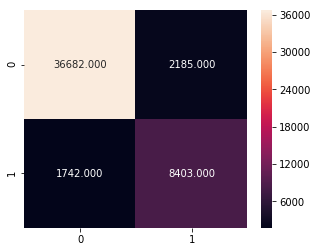

In [256]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.3f')

#### Evaluate  ROC Curve

In [263]:
from sklearn.metrics import roc_curve, auc

In [264]:
# creating ROC curve of our test data
# To Do Replace 1,2,3,4
# 1 = Model name, 2 = train data, 3 = train label, 4 = test data
y_score = logReg.fit(X_train, y_train).decision_function(X_train)

# fpr stands for false positive rate, and tpr stands for true positive rate.
#To do replace 5 with test label
fpr, tpr, thresholds = roc_curve(y_train, y_score)

#### Run Cell as is

AUC is 0.9506878519993462


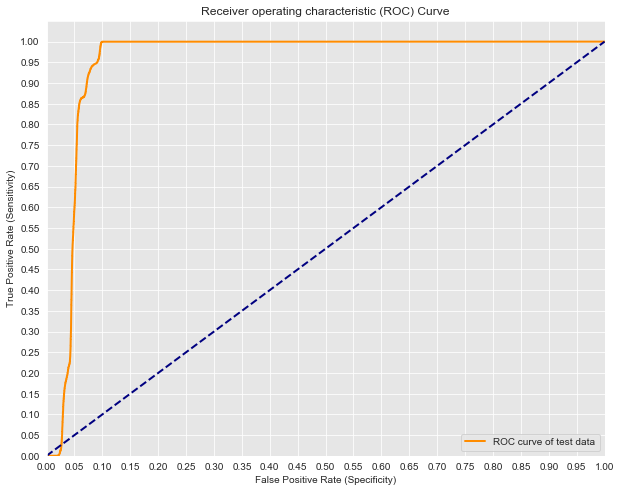

In [265]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Scale the data

In [266]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(X)

In [272]:
scale_train,scale_test,result_train,result_test = train_test_split(x_scaled,
                                                                  y,
                                                                  test_size = 0.2,
                                                                  random_state = 11)

#### Train Model

In [273]:
logReg = LogisticRegression()
logReg.fit(scale_train,result_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict 

In [275]:
scaled_predictions = logReg.predict(scale_test)

#### Check Accuracy

In [276]:
print('Accuracy is {:.3f}'.format(accuracy_score(result_test,scaled_predictions)*100))

Accuracy is 92.098


# GREAT JOB!!!